In [34]:
import pandas as pd 
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
df = pd.read_csv('reviews.txt', sep='\t', names =['Reviews','Comments'])

In [21]:
df.head()

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Reviews   6918 non-null   int64 
 1   Comments  6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


In [23]:
df.isnull().sum()

Reviews     0
Comments    0
dtype: int64

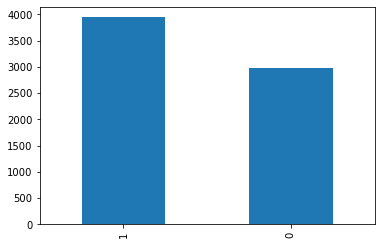

In [26]:
df['Reviews'].value_counts().plot(kind='bar')

In [27]:
stopset = set(stopwords.words('english'))

In [28]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

In [29]:
X = vectorizer.fit_transform(df.Comments)
y = df.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [35]:
accuracy_score(y_test,clf.predict(X_test))*100

97.47109826589595

In [37]:
clf = MultinomialNB()
clf.fit(X,y)

MultinomialNB()

In [38]:
accuracy_score(y_test,clf.predict(X_test))*100

98.77167630057804

In [39]:
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))